In [3]:
!python ../scripts/register.py --moving D:/Computer_vision/voxel_morph/neurite-oasis.2d.v1.0/OASIS_OAS1_0395_MR1/slice_norm.nii.gz --fixed D:/Computer_vision/voxel_morph/neurite-oasis.2d.v1.0/OASIS_OAS1_0442_MR1/slice_norm.nii.gz --model ../models_mse_us_scan/0000.h5 --moved ./moved.nii.gz --warp ./warp.nii.gz


1/1 [==============================] - 2s 2s/step

1/1 [==============================] - 0s 224ms/step


2025-12-02 15:02:02.525455: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2025-12-02 15:02:02.525756: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2025-12-02 15:02:08.662994: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2025-12-02 15:02:08.663275: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2025-12-02 15:02:08.667560: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: MSI
2025-12-02 15:02:08.668034: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: MSI
2025-12-02 15:02:08.668631: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI D

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
i

In [5]:
file_path = "./moved.nii.gz"
img = nib.load(file_path)
data = img.get_fdata()
header = img.header
print(f"--- File: {file_path} ---")
print("Shape:", data.shape)
print("Data type:", data.dtype)
print("Voxel size (mm):", header.get_zooms())
print("Min value:", np.min(data))
print("Max value:", np.max(data))
print("Mean value:", np.mean(data))
print("\n")

--- File: ./moved.nii.gz ---
Shape: (160, 192)
Data type: float64
Voxel size (mm): (1.0, 1.0)
Min value: 0.0
Max value: 0.8274343609809875
Mean value: 0.14071695247853103




In [6]:
file_path = "./warp.nii.gz"
img = nib.load(file_path)
data = img.get_fdata()
header = img.header
print(f"--- File: {file_path} ---")
print("Shape:", data.shape)
print("Data type:", data.dtype)
print("Voxel size (mm):", header.get_zooms())
print("Min value:", np.min(data))
print("Max value:", np.max(data))
print("Mean value:", np.mean(data))
print("\n")

--- File: ./warp.nii.gz ---
Shape: (160, 192, 2)
Data type: float64
Voxel size (mm): (1.0, 1.0, 1.0)
Min value: -3.6523808375932276e-05
Max value: 0.0001872131397249177
Mean value: 1.875106837900203e-05




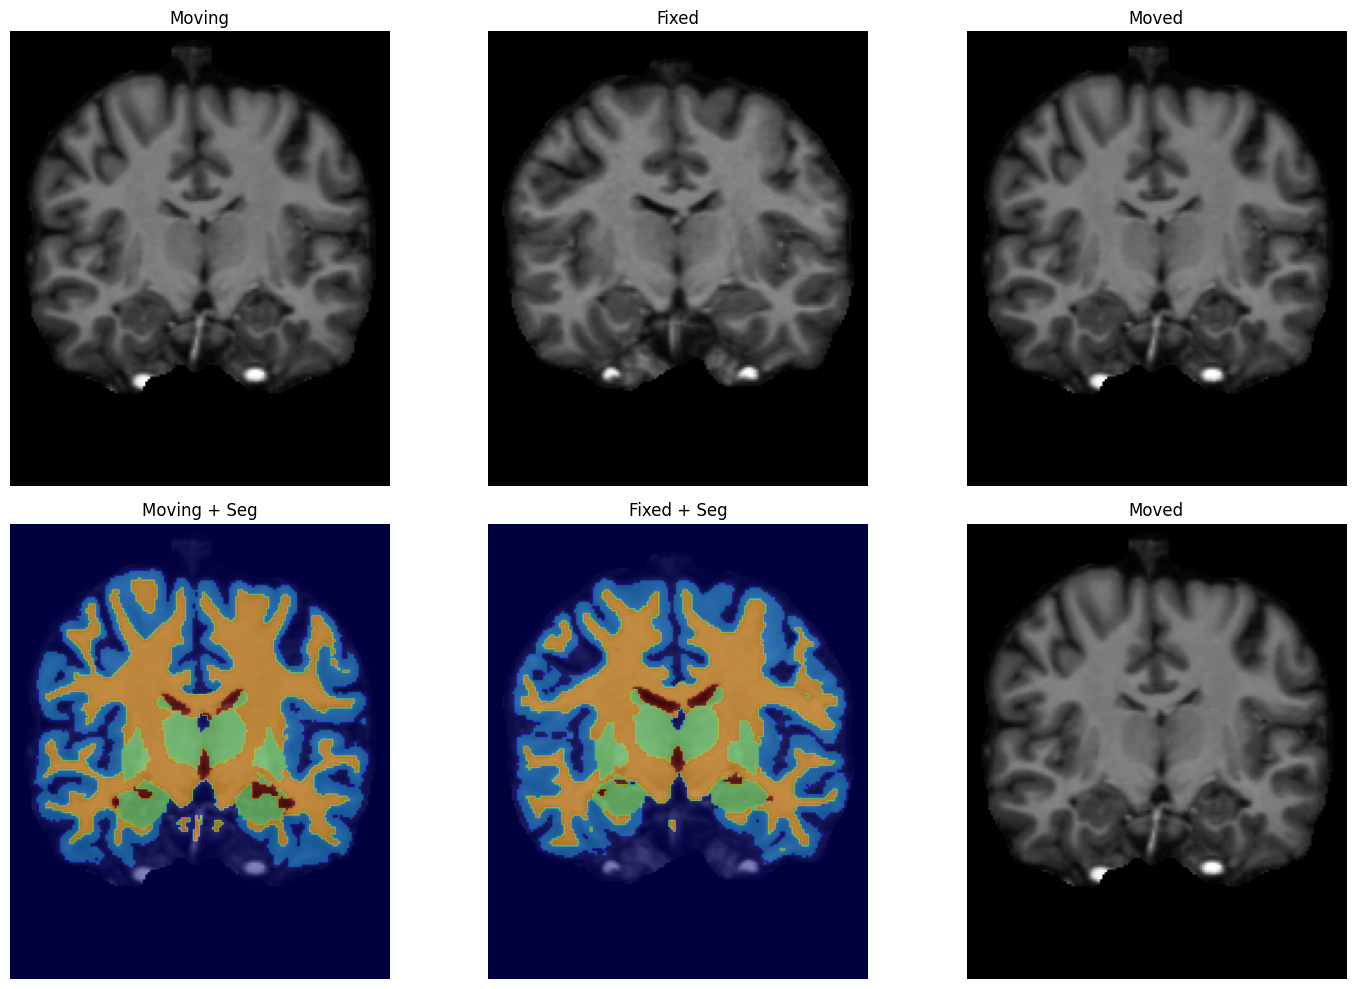

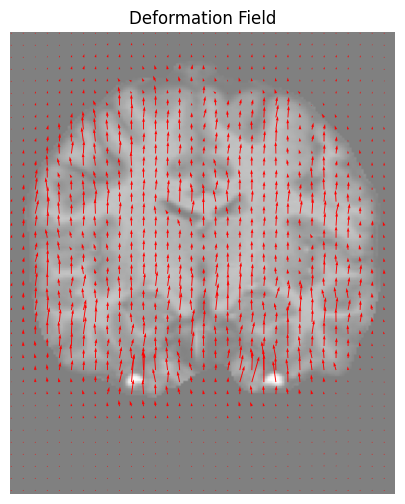

In [9]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

def load_nii(path):
    return nib.load(path).get_fdata()

def rotate_img(img):
    return np.rot90(img, k=-1)  # Xoay -90 độ

# Load images
moving = rotate_img(load_nii(r'D:/Computer_vision/voxel_morph/neurite-oasis.2d.v1.0/OASIS_OAS1_0395_MR1/slice_norm.nii.gz')[:,:,0])
fixed  = rotate_img(load_nii(r'D:/Computer_vision/voxel_morph/neurite-oasis.2d.v1.0/OASIS_OAS1_0442_MR1/slice_norm.nii.gz')[:,:,0])
moved  = rotate_img(load_nii('./moved.nii.gz')[:,:])

moving_seg = rotate_img(load_nii(r'D:/Computer_vision/voxel_morph/neurite-oasis.2d.v1.0/OASIS_OAS1_0395_MR1/slice_seg4.nii.gz')[:,:,0])
fixed_seg  = rotate_img(load_nii(r'D:/Computer_vision/voxel_morph/neurite-oasis.2d.v1.0/OASIS_OAS1_0442_MR1/slice_seg4.nii.gz')[:,:,0])

# Load deformation field (HxWx2) và xoay từng kênh
flow = load_nii('./warp.nii.gz')
flow_rot = np.stack([rotate_img(flow[...,0]), rotate_img(flow[...,1])], axis=-1)

# Visualize images
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0,0].imshow(moving, cmap='gray'); axes[0,0].set_title('Moving'); axes[0,0].axis('off')
axes[0,1].imshow(fixed, cmap='gray'); axes[0,1].set_title('Fixed'); axes[0,1].axis('off')
axes[0,2].imshow(moved, cmap='gray'); axes[0,2].set_title('Moved'); axes[0,2].axis('off')

axes[1,0].imshow(moving, cmap='gray'); axes[1,0].imshow(moving_seg, cmap='jet', alpha=0.5); axes[1,0].set_title('Moving + Seg'); axes[1,0].axis('off')
axes[1,1].imshow(fixed, cmap='gray'); axes[1,1].imshow(fixed_seg, cmap='jet', alpha=0.5); axes[1,1].set_title('Fixed + Seg'); axes[1,1].axis('off')
axes[1,2].imshow(moved, cmap='gray'); axes[1,2].set_title('Moved'); axes[1,2].axis('off')

plt.tight_layout()
plt.show()

# Visualize deformation field
H, W = flow_rot.shape[:2]
Y, X = np.mgrid[0:H:5, 0:W:5]
U = flow_rot[::5, ::5, 0]
V = flow_rot[::5, ::5, 1]

plt.figure(figsize=(6,6))
plt.imshow(fixed, cmap='gray', alpha=0.5)
plt.quiver(X, Y, U, V, color='r')
plt.title('Deformation Field')
plt.axis('off')
plt.show()
